# 목차
<hr/>

<ol>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">필요한 모듈 불러오기</i>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 들어가며</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 참가 규칙, 평가 기준 살펴보기
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 살펴보기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li><li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 대회의 시작: 참가 규칙과 데이터, 평가 기준 살펴보기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 준비
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 이해</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : 일단 제출하고 시작해!  Baseline 모델</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> Baseline 셋팅하기
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 이해</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : 랭킹을 올리고 싶다면? 최적의 모델을 찾아서, 하이퍼 파라미터 튜닝</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 준비
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 이해</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 5</span> : 프로젝트: This is your playground! Leaderboard를 정복해주세요!</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 준비
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 이해</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train, test 데이터 분리</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">회고</i>
</ol>

<div style = "height: 50px;"><div/>

# 필요한 모듈 불러오기

In [1]:
# 필요한 모듈 불러오기
import warnings
warnings.filterwarnings("ignore")

import lightgbm          as lgb
import matplotlib.pyplot as plt
import missingno         as msno
import numpy             as np
import os
import pandas            as pd
import seaborn           as sns
import xgboost           as xgb


from os.path                 import join
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics         import mean_squared_error

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<div style = "height: 50px;"><div/>

# <span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 데이터, 평가 기준 살펴보기

[참여할 캐글 대회](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)

## 1. 대회 소개, 평가 기준 살펴보기
<hr/>

### (1)Description, 대회 소개

<p style= "font-size:15px; line-height:24px;">데이터는 20개의 변수를 가지고 있으며, 어떤 조건을 가진 집의 가격이 높고 낮은지를 예측하는 모델을 만드는 것이 목표이다.<br/>
따라서, 이 문제는 집값을 예측하는 <span style = 'background-color:#fff5b1; padding:0.2px;'>회귀</span> 문제이다.</p>

<div style = "height: 25px;"></div>

### (2) Evaluation, 점수 평가 기준
<p style= "font-size:15px; line-height:24px;">
평가 방식은 <span style = 'background-color:#fff5b1; padding:0.2px;'>RMSE (Root Mean Squared Error)</span> 이다.
$${\sqrt{ {1 \over N} \sum{(yt - y{pr})}^2}} $$</p>

<div style = "height: 50px;"><div/>

## 2. 데이터 살펴보기
<hr/>

### (1) 데이터 설명

<ul>
	<li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">train.csv</span> - 예측 모델을 만들기 위해 사용하는 학습 데이터이다. 집의 정보와 예측할 변수인 가격(Price) 변수를 가지고 있다.</li>
	<li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">test.csv</span> - 학습셋으로 만든 모델을 가지고 예측할 가격(Price) 변수를 제외한 집의 정보가 담긴 테스트 데이터이다.</li>
	<li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sample_submission.csv</span> - 제출시 사용할 수 있는 예시 submission.csv 파일</li>
</ul>

#### Data fields

<ul>
	<li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">ID : </span> 집을 구분하는 번호</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">date : </span> 집을 구매한 날짜</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">price : </span> 집의 가격(Target variable)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">bedrooms : </span> 침실의 수</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">bathrooms : </span> 화장실의 수</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_living : </span> 주거 공간의 평방 피트(면적)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_lot : </span> 부지의 평방 피트(면적)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">floors : </span> 집의 층 수</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">waterfront : </span> 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">view : </span> 집이 얼마나 좋아 보이는지의 정도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">condition : </span> 집의 전반적인 상태</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">grade : </span> King County grading 시스템 기준으로 매긴 집의 등급</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_above : </span> 지하실을 제외한 평방 피트(면적)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_basement : </span> 지하실의 평방 피트(면적)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">yr_built : </span> 지어진 년도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">yr_renovated : </span> 집을 재건축한 년도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">zipcode : </span> 우편번호</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">lat : </span> 위도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">long : </span> 경도</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_living15 : </span> 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">sqft_lot15 : </span> 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)</li>
</ul>

<p style= "font-size:15px; line-height:24px;">우리가 예측해야 하는 컬럼은 price(집의 가격)이다. <br/>따라서 <span style = 'background-color:#fff5b1; padding:0.2px;'>타겟값은 'price'이다.</span></p>

<div style = "height: 25px;"><div/>

### (2) 목표

<p style= "font-size:15px; line-height:24px;">train.csv를 활용해서 데이터를 전처리하여 모델을 학습시킨 후, <br/>test.csv 파일의 데이터에 대해 price를 예측한 후 sample_submission.csv의 형식에 맞는 형태로 캐글에 제출을 할 것이다.</p>

<div style = "height: 50px;"><div/>

# <span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 데이터 이해하기 (EDA)

## 1. 데이터 불러오기
<hr/>

In [2]:
# 데이터 경로
train_data_path = join('data_2/train.csv')
test_data_path = join('data_2/test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로

print(train_data_path)
print(test_data_path)

data_2/train.csv
data_2/test.csv


In [3]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('train data dim : {}'.format(train.shape))
print('test data dim : {}'.format(test.shape))

train data dim : (15035, 21)
test data dim : (6468, 20)


<p style= "font-size:15px; line-height:24px;">학습 데이터는 약 1만 5천 개, 테스트 데이터는 약 6천 개로 이루어져있다.<br/>
테스트 데이터는 타겟값인 price가 없기 때문에 컬럼이 하나 적은 것으로 판단된다.</p>

<div style = "height: 50px;"><div/>

## 2. 상관계수 확인하기

In [4]:
train.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.020899  0.010520   0.104030     0.041725 -0.034077   
price          0.020899  1.000000  0.323672   0.525479     0.702899  0.096793   
bedrooms       0.010520  0.323672  1.000000   0.530548     0.596974  0.033475   
bathrooms      0.104030  0.525479  0.530548   1.000000     0.755853  0.089308   
sqft_living    0.041725  0.702899  0.596974   0.755853     1.000000  0.176500   
sqft_lot      -0.034077  0.096793  0.033475   0.089308     0.176500  1.000000   
floors         0.182848  0.262588  0.189532   0.508649     0.363193  0.001535   
waterfront    -0.011775  0.265738 -0.004819   0.075452     0.108137  0.025584   
view          -0.024360  0.400806  0.085703   0.187488     0.282821  0.080441   
condition     -0.101618  0.039740  0.034885  -0.125907    -0.054213 -0.002099   
grade          0.078622  0.667211  0.375286   0.666278     0.762543  0.119906   
sqft_above     0.073086  0.608577  0.494867   0.688255     0.878736  0.186242   
sqft_basement -0.050634  0.322218  0.315183   0.282642     0.434017  0.017818   
yr_built       0.202477  0.047290  0.158799   0.503964     0.315927  0.058686   
yr_renovated  -0.029810  0.140808  0.022729   0.065423     0.064893 -0.001451   
zipcode       -0.005761 -0.051498 -0.162081  -0.207500    -0.200745 -0.127709   
lat            0.002588  0.301604 -0.011190   0.018110     0.051609 -0.082234   
long           0.014757  0.023547  0.135802   0.227669     0.245429  0.227451   
sqft_living15  0.029248  0.586419  0.407394   0.573541     0.760271  0.147562   
sqft_lot15    -0.032269  0.086384  0.027242   0.088120     0.184176  0.728458   

                 floors  waterfront      view  condition     grade  \
id             0.182848   -0.011775 -0.024360  -0.101618  0.078622   
price          0.262588    0.265738  0.400806   0.039740  0.667211   
bedrooms       0.189532   -0.004819  0.085703   0.034885  0.375286   
bathrooms      0.508649    0.075452  0.187488  -0.125907  0.666278   
sqft_living    0.363193    0.108137  0.282821  -0.054213  0.762543   
sqft_lot       0.001535    0.025584  0.080441  -0.002099  0.119906   
floors         1.000000    0.031159  0.034511  -0.261016  0.462598   
waterfront     0.031159    1.000000  0.389669   0.011613  0.088061   
view           0.034511    0.389669  1.000000   0.045255  0.247924   
condition     -0.261016    0.011613  0.045255   1.000000 -0.143599   
grade          0.462598    0.088061  0.247924  -0.143599  1.000000   
sqft_above     0.529476    0.081968  0.172693  -0.152856  0.759240   
sqft_basement -0.239350    0.071576  0.265880   0.175064  0.162657   
yr_built       0.490436   -0.026523 -0.061670  -0.366590  0.440608   
yr_renovated   0.009752    0.104168  0.107605  -0.062342  0.030155   
zipcode       -0.059107    0.028632  0.089247   0.001106 -0.186541   
lat            0.049004   -0.014772  0.005285  -0.015974  0.112319   
long           0.126983   -0.037922 -0.073151  -0.110742  0.202130   
sqft_living15  0.287125    0.091810  0.278267  -0.091407  0.715321   
sqft_lot15    -0.010287    0.028255  0.076501  -0.003873  0.119734   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id               0.073086      -0.050634  0.202477     -0.029810 -0.005761   
price            0.608577       0.322218  0.047290      0.140808 -0.051498   
bedrooms         0.494867       0.315183  0.158799      0.022729 -0.162081   
bathrooms        0.688255       0.282642  0.503964      0.065423 -0.207500   
sqft_living      0.878736       0.434017  0.315927      0.064893 -0.200745   
sqft_lot         0.186242       0.017818  0.058686     -0.001451 -0.127709   
floors           0.529476      -0.239350  0.490436      0.009752 -0.059107   
waterfront       0.081968       0.071576 -0.026523      0.104168  0.028632   
view             0.172693       0.265880 -0.061670      0.107605  0.089247   
condition       -0.152856       0.175064 -0.366590     -0.062342  0.

상관계수를 확인해본 결과, 모두 상관 관계가 있는 것으로 판단하였다.

<div style = "height: 50px;"><div/>

## 3. 각 칼럼들의 데이터분포 확인

### (1) date 칼럼 정리하기
- 20141013T000000 형식의 데이터를 연/월 데이터만 사용하기 위해 str(x[:6]) 으로 연/월까지 자른다.

#### 학습 데이터

In [5]:
train['date'] = train['date'].apply(lambda x : str(x[:6])).astype(int)
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

#### 테스트 데이터

In [6]:
test['date'] = test['date'].apply(lambda i : i[:6]).astype(int)
test.head()

id    date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  15035  201412         3       2.25         2570      7242     2.0   
1  15036  201412         4       3.00         1960      5000     1.0   
2  15037  201405         4       4.50         5420    101930     1.0   
3  15038  201504         3       1.00         1780      7470     1.0   
4  15039  201503         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        2170            400      1951   
1           0     0          5      7        1050            910      1965   
2           0     0          3     11        3890           1530      2001   
3           0     0          3      7        1050            730      1960   
4           0     0          3      7        1890              0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0          1991    98125  47.7210 -122.319           1690        7639  
1             0    98136  47.5208 -122.393           1360        5000  
2             0    98053  47.6561 -122.005           4760      101930  
3             0    98146  47.5123 -122.337           1780        8113  
4             0    98038  47.3684 -122.031           2390        7570

In [7]:
test['date']

0       201412
1       201412
2       201405
3       201504
4       201503
         ...  
6463    201406
6464    201501
6465    201502
6466    201406
6467    201501
Name: date, Length: 6468, dtype: int64

<div style = "height: 25px;"></div>

### (2) 데이터 분포 시각화하기

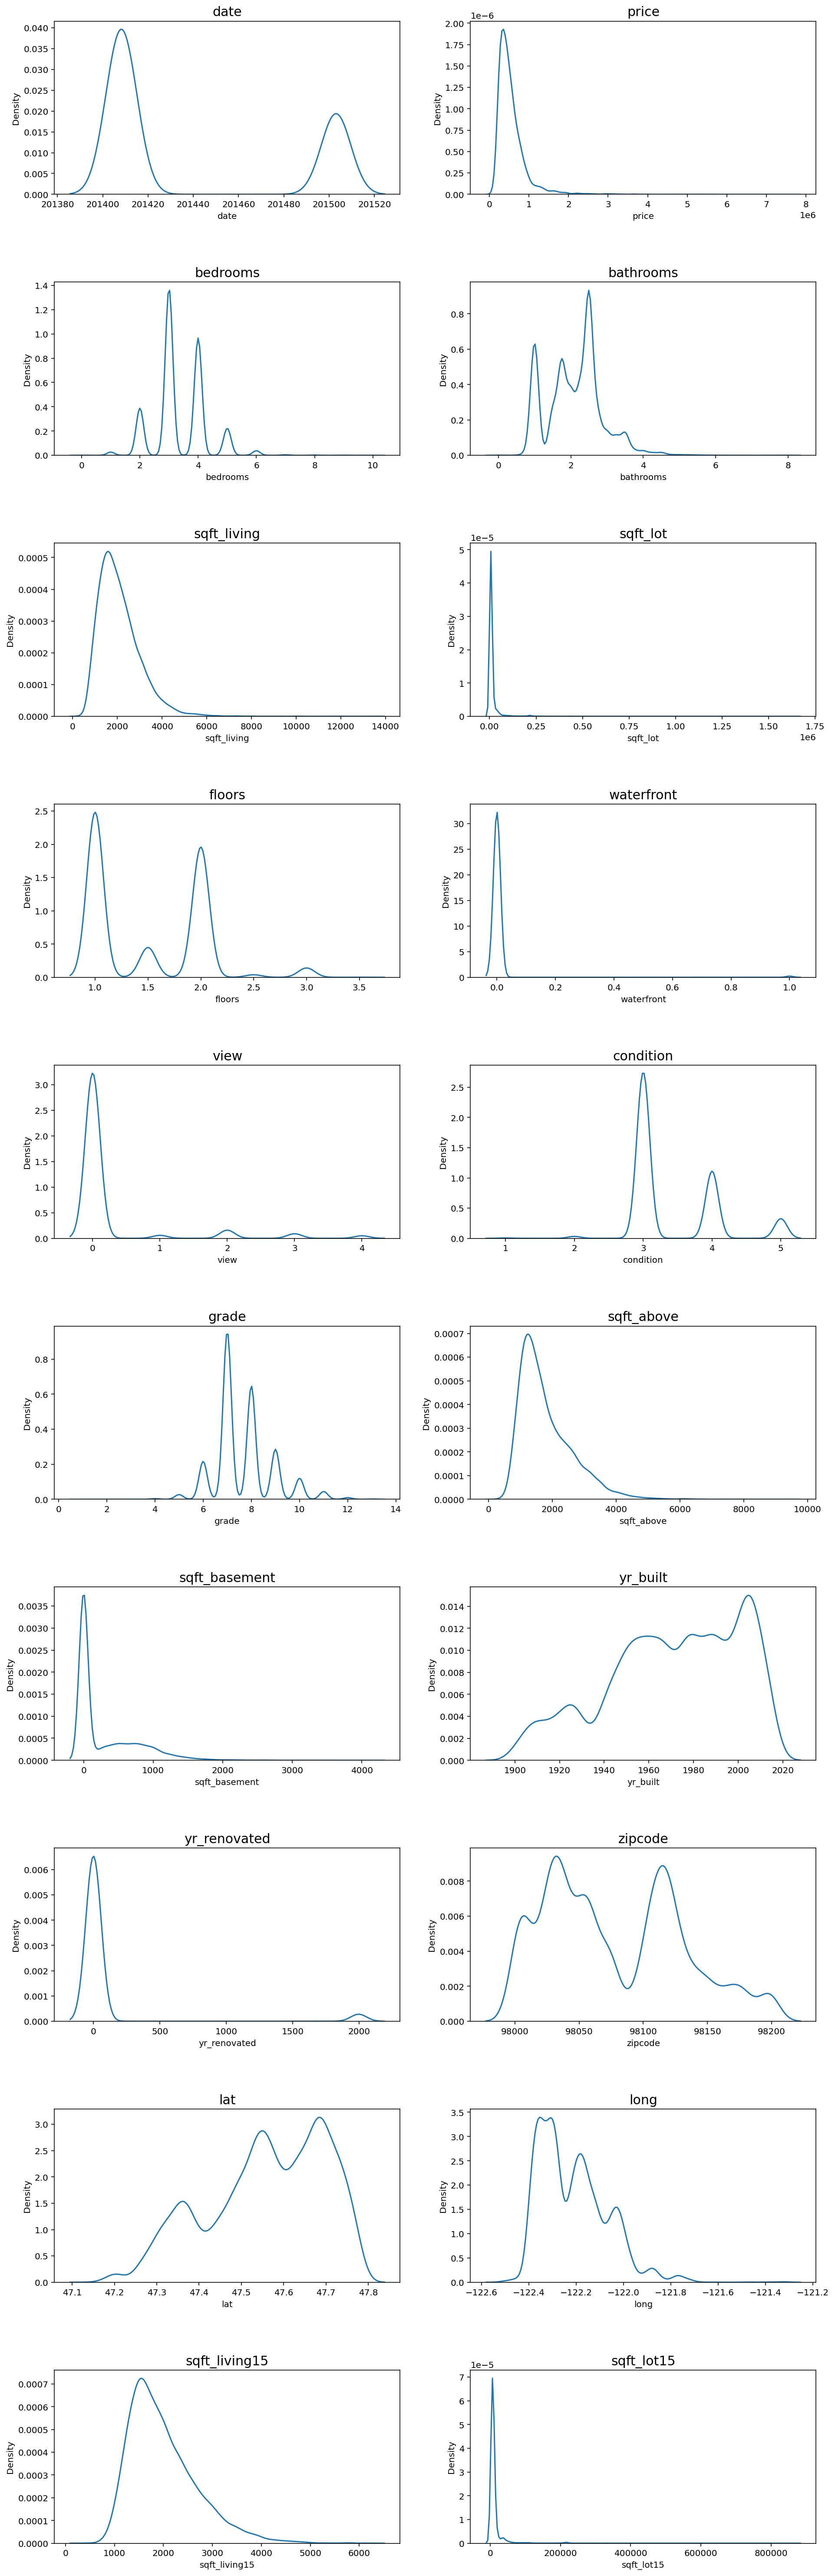

In [8]:
# 데이터 분포 확인하기
fig, ax = plt.subplots(10, 2, figsize = (14, 42))
plt.tight_layout(pad = 5, h_pad = 8)

# id 변수(count == 0인 경우)는 제외하고 분포를 확인함
count = 1
columns = train.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(data=train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize = 15)
        count += 1
        if count == 21:
            break

<div style = "height: 25px;"></div>

### (3) 데이터 분포를 정규화시키기기 위해 log 적용하기

price, bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement 변수가 한쪽으로 치우친 것을 확인할 수 있었다.<br/>
따라서, log-scaling을 통해 데이터를 가우시안 분포(정규분포)로 만들어 시각화를 하여 확인 할 것이다.

In [9]:
skew_columns = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    train[c] = np.log1p(train[c].values)

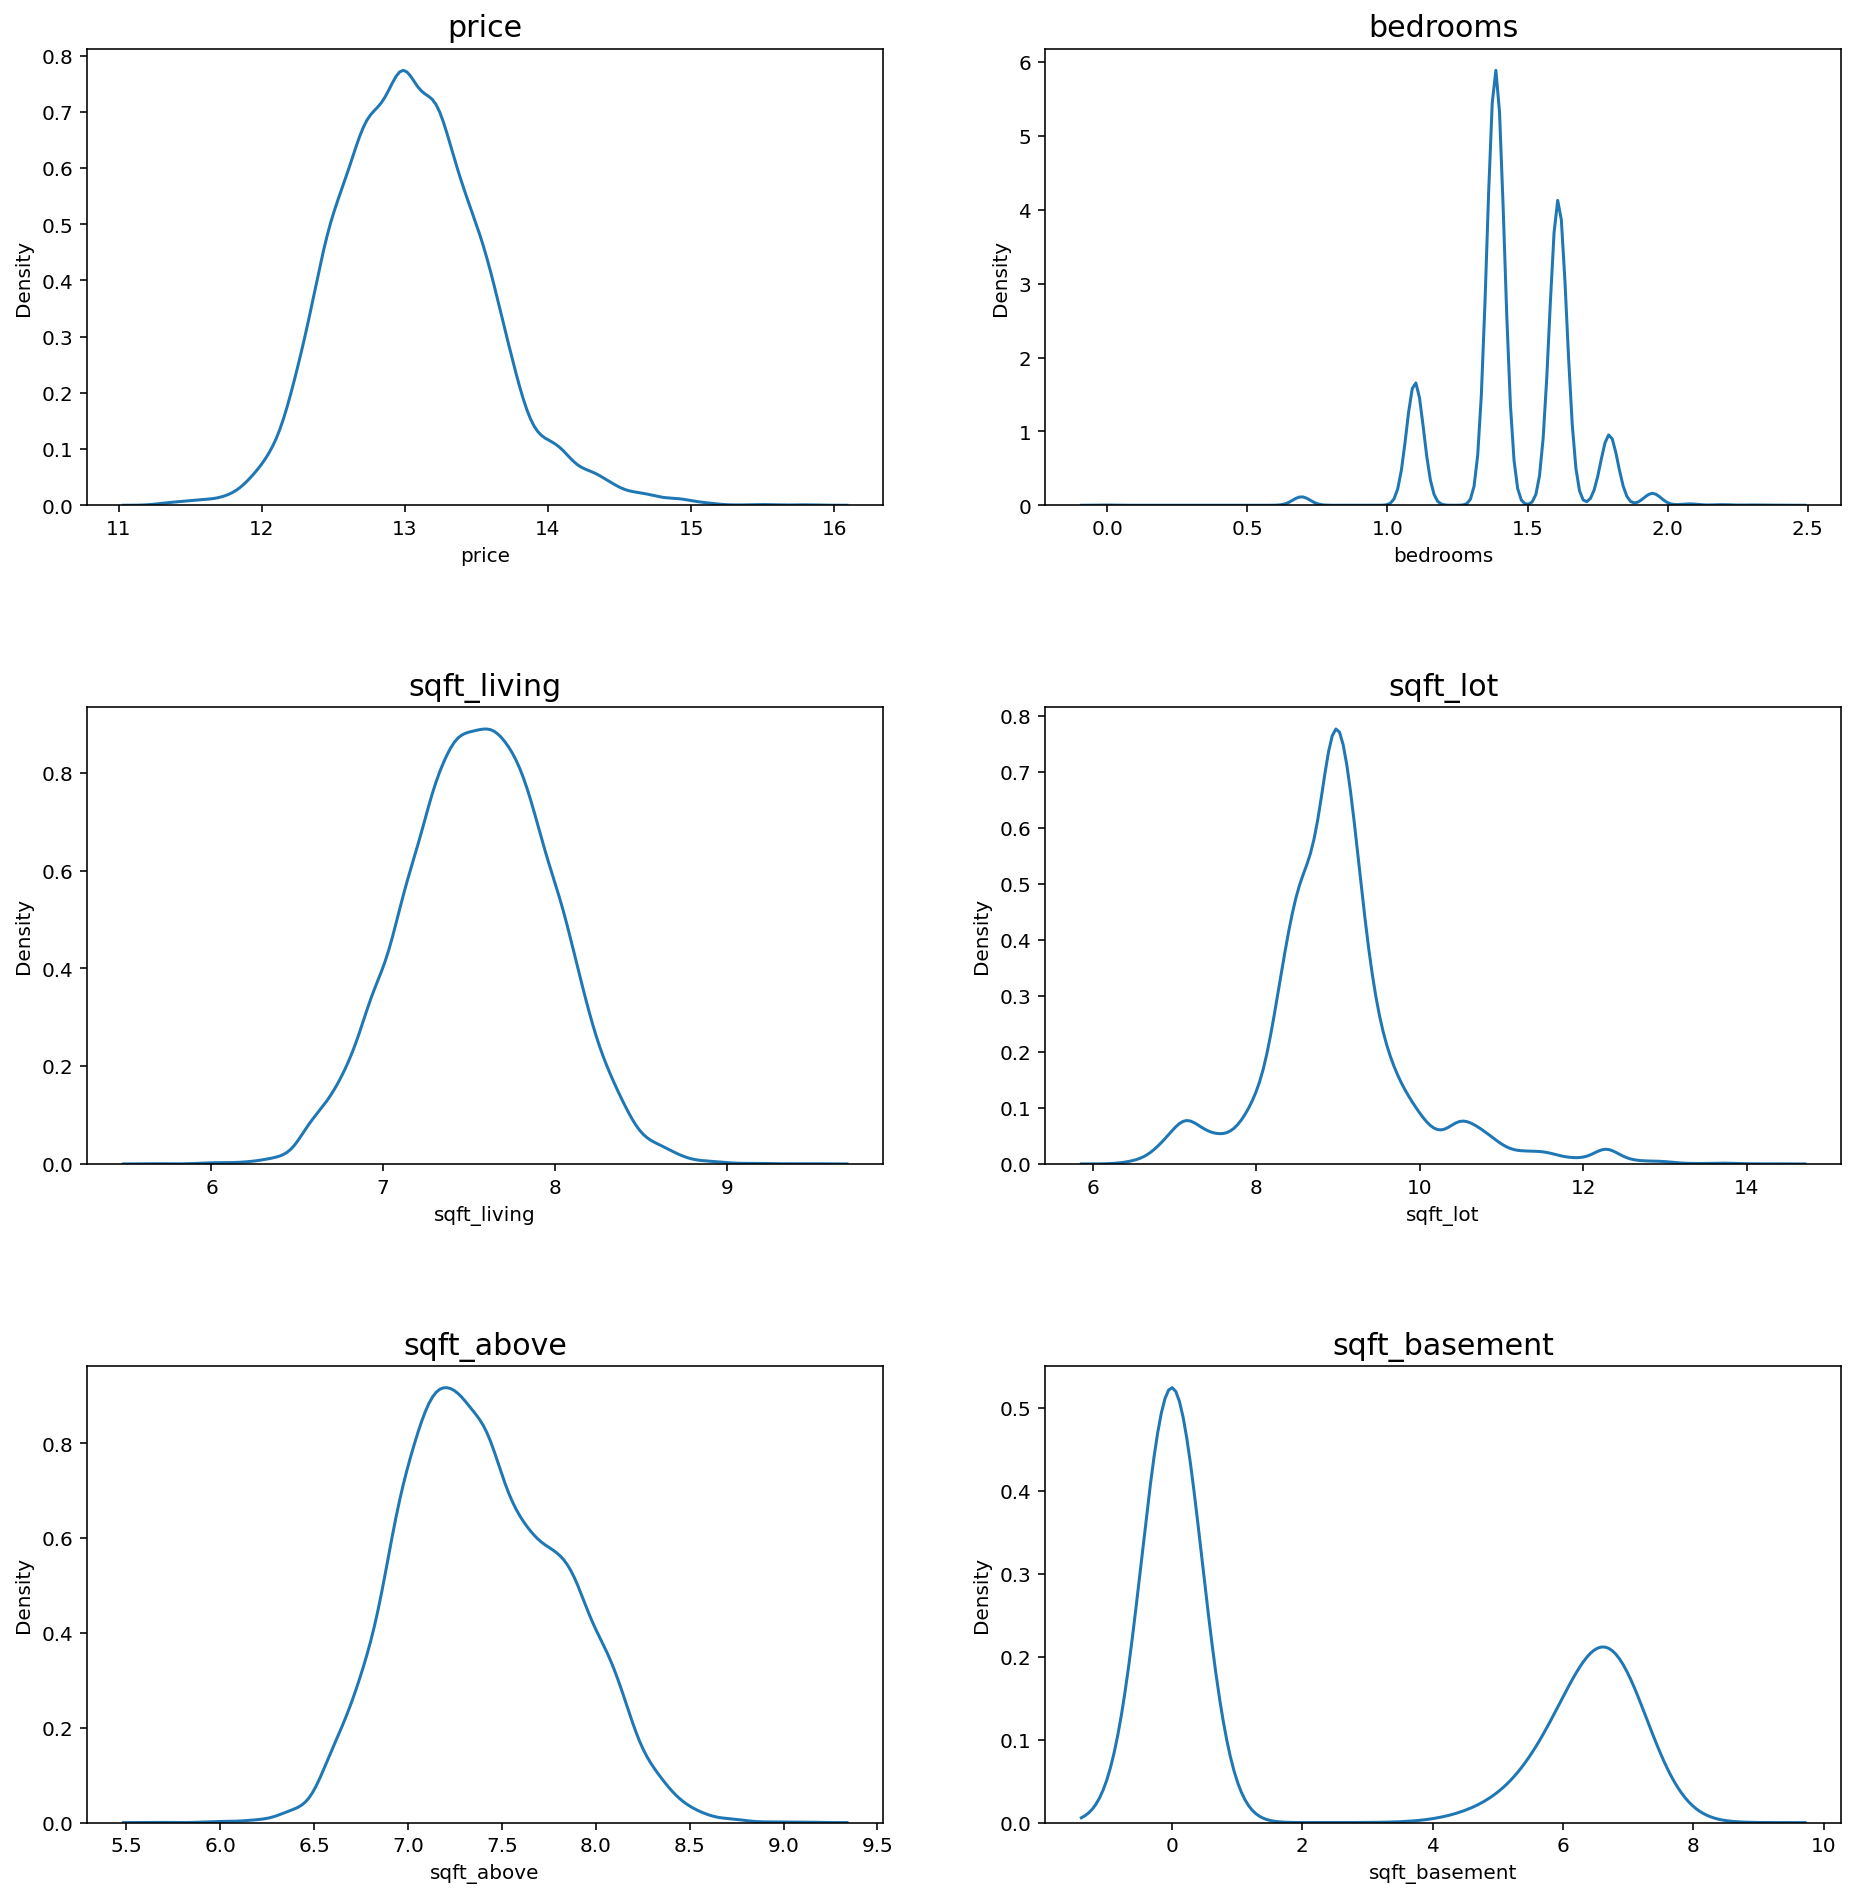

In [10]:
# 데이터 분포 확인하기
fig, ax = plt.subplots(3, 2, figsize = (14, 14))
plt.tight_layout(pad = 5, h_pad = 8)

count = 0
for row in range(3):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(train[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1

로그 함수를 적용하니, 이전보다 훨씬 치우침이 줄어든 분포를 확인할 수 있었다.

<div style = "height: 50px;"></div>

## 4. 결측치 확인하기

In [11]:
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:>

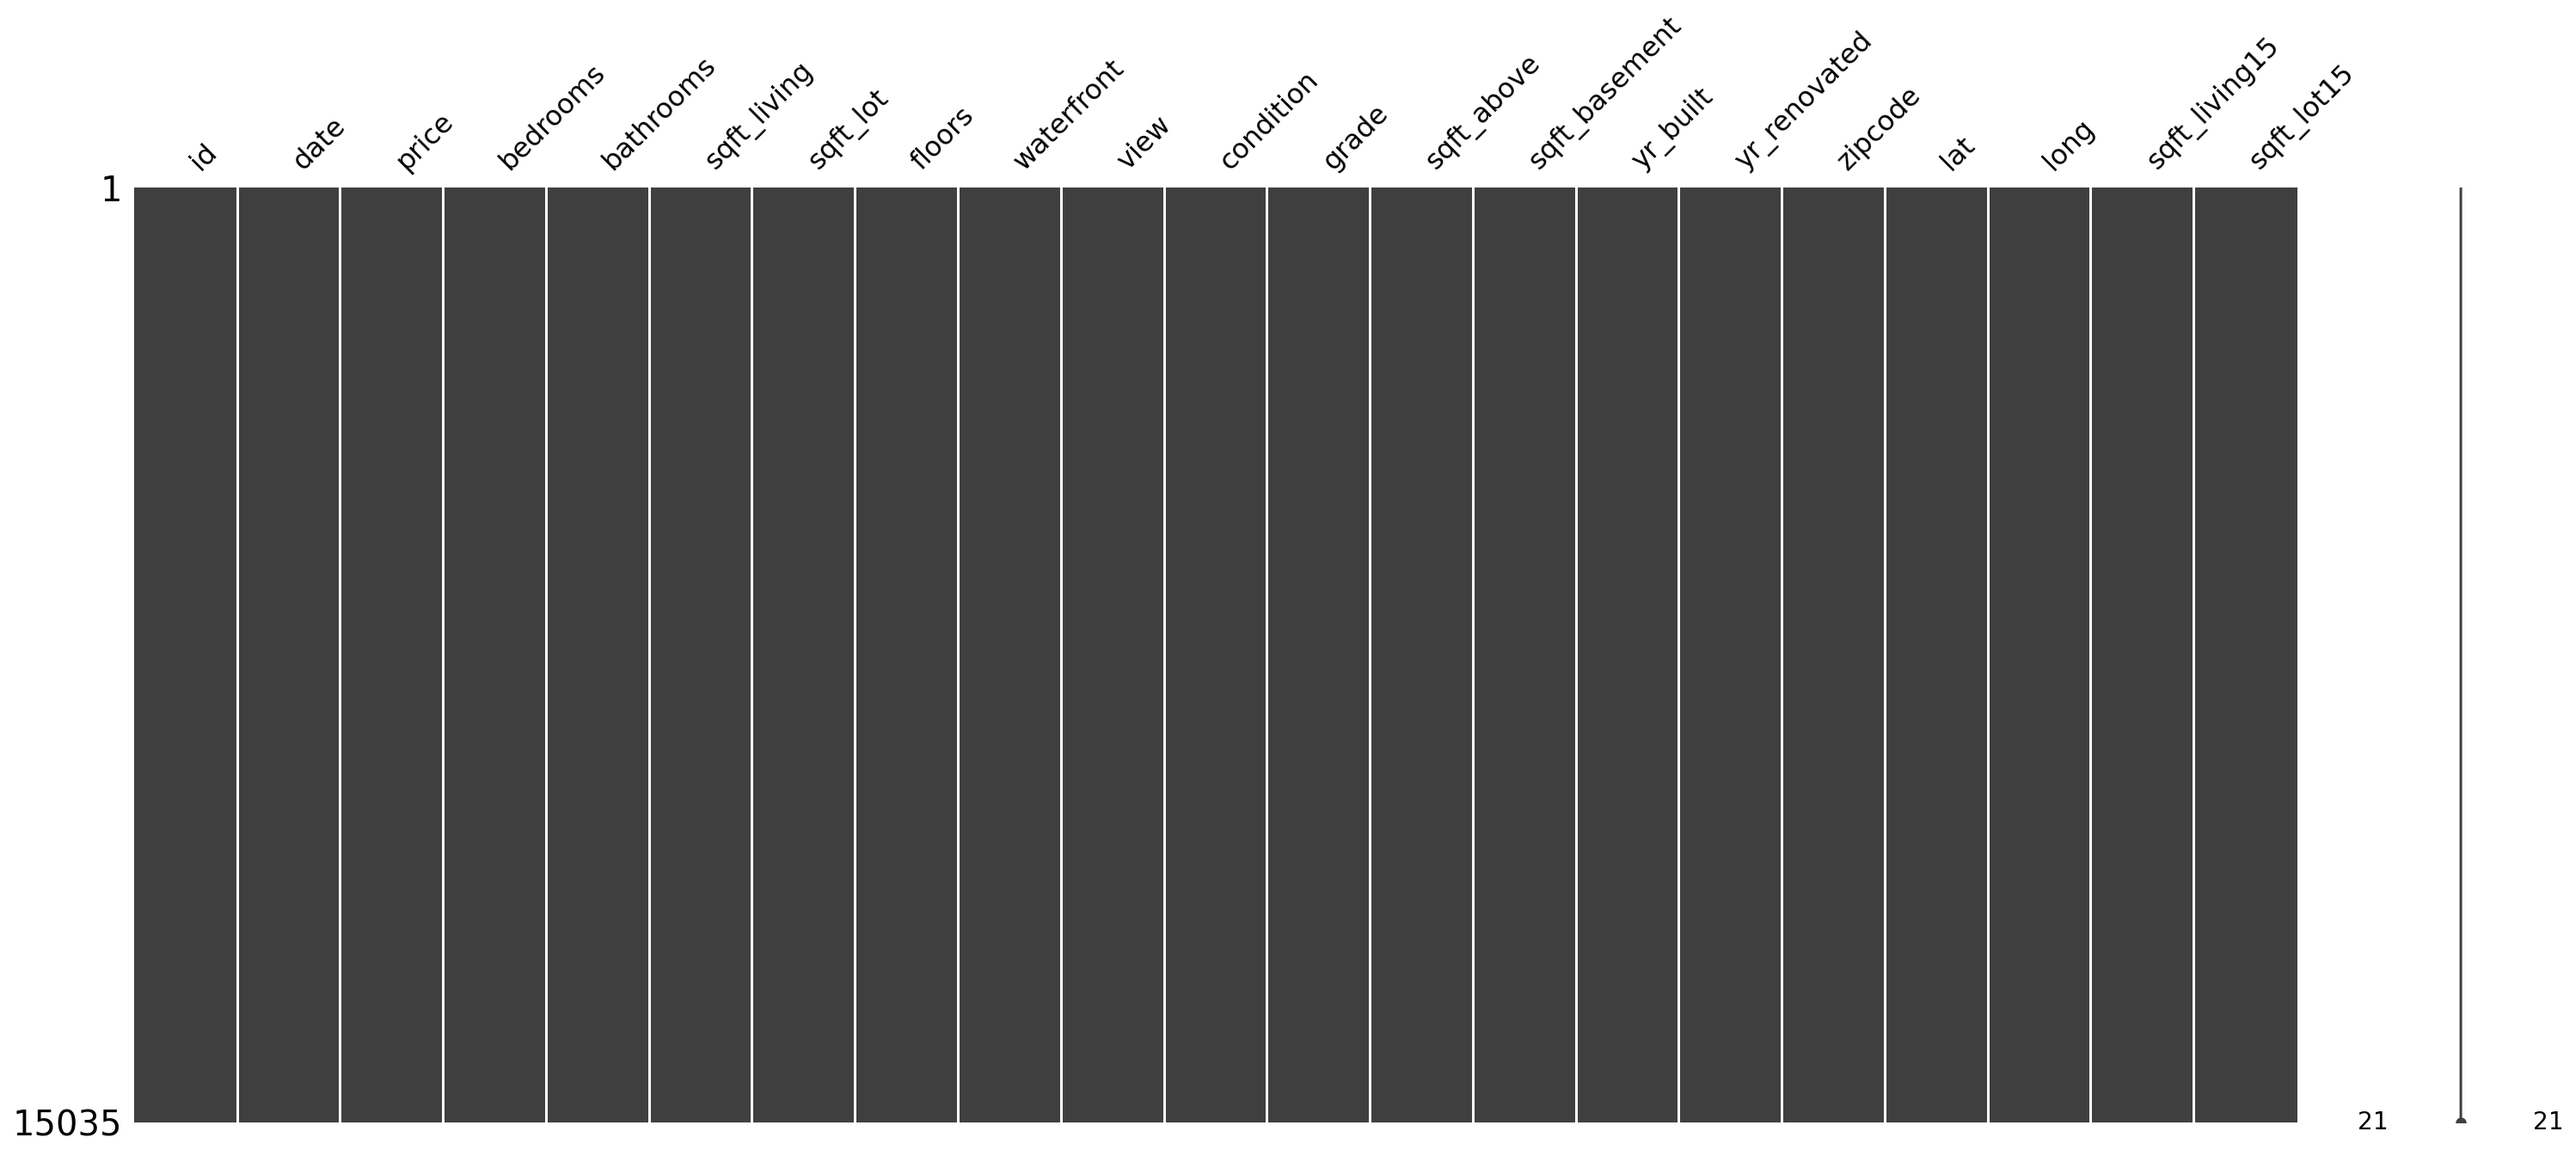

In [12]:
# missingno 라이브러리의 matrix함수 사용하여 결측치 시각화
msno.matrix(train)

<div style = "height: 50px;"></div>

## 5. yr_renovated 원-핫인코딩하기

yr_renovated는 재건축의 년도가 아닌 재건축 여부로(int > bool)변경할 것이다.

#### 학습 데이터

In [13]:
train['yr_renovated'].unique()

array([   0, 2002, 1999, 1991, 1978, 2005, 2008, 2003, 1994, 1984, 1954,
       2014, 2011, 1974, 1983, 2013, 1990, 1957, 1977, 1981, 1995, 2000,
       1986, 1992, 2004, 2007, 1987, 2006, 1985, 1971, 1945, 1979, 1997,
       2010, 1969, 1948, 2009, 1970, 2015, 1989, 2001, 1968, 2012, 1963,
       1993, 1962, 1972, 1980, 1998, 1955, 1996, 1950, 1956, 1982, 1988,
       1940, 1946, 1975, 1964, 1958, 1976, 1973, 1967, 1965, 1944])

<AxesSubplot:xlabel='yr_renovated', ylabel='count'>

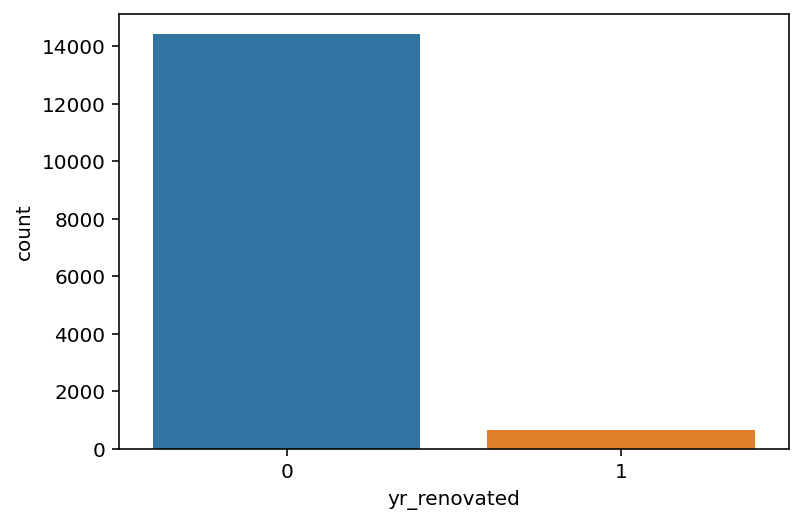

In [14]:
train['yr_renovated'] = train['yr_renovated'] != 0
train['yr_renovated'] = train['yr_renovated'].astype(int)
sns.countplot(x = train['yr_renovated'], data = train)

#### 테스트 데이터

<AxesSubplot:xlabel='yr_renovated', ylabel='count'>

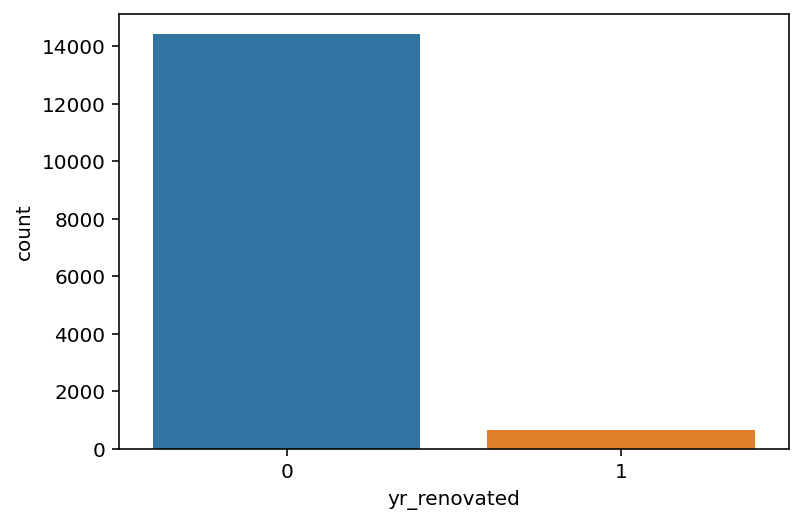

In [15]:
test['yr_renovated'] = test['yr_renovated'] != 0
test['yr_renovated'] = test['yr_renovated'].astype(int)
sns.countplot(x = train['yr_renovated'], data = test)

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : 각종 전처리 수행하기

## 1. id 삭제하기
<hr/>

id는 집을 구분하는 번호이다. 칼럼 'price'를 예측하는데에 도움을 주지 않으므로 삭제한다.

#### 학습 데이터

In [16]:
del train['id']
print(train.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


#### 테스트 데이터

In [17]:
sub_id = test['id'] 
del test['id']
print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


<div style = "height: 50px;"><div/>

## 2. 학습 데이터에서 라벨 제거 및 x, y값 지정하기
<hr/>

In [18]:
train

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      201410  12.309987  1.386294       1.00     7.074117  8.639588     1.0   
1      201502  12.100718  1.098612       1.00     6.647688  9.210440     1.0   
2      201502  13.142168  1.386294       2.00     7.427144  8.997271     1.0   
3      201406  12.458779  1.386294       2.25     7.447751  8.827615     2.0   
4      201501  12.583999  1.386294       1.50     6.966967  9.181118     1.0   
...       ...        ...       ...        ...          ...       ...     ...   
15030  201410  13.322338  1.609438       2.50     7.832411  8.703507     2.0   
15031  201503  13.822984  1.609438       3.50     8.163656  8.881975     2.0   
15032  201405  12.793862  1.386294       2.50     7.333676  7.031741     3.0   
15033  201502  12.899222  1.609438       2.50     7.745436  8.668024     2.0   
15034  201410  12.691584  1.098612       0.75     6.928538  6.981935     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7    7.074117       0.000000   
1               0     0          3      6    6.647688       0.000000   
2               0     0          3      8    7.427144       0.000000   
3               0     0          3      7    7.447751       0.000000   
4               0     0          3      7    6.966967       0.000000   
...           ...   ...        ...    ...         ...            ...   
15030           0     0          3      9    7.832411       0.000000   
15031           0     0          3      9    7.863651       6.814543   
15032           0     0          3      8    7.333676       0.000000   
15033           0     0          3      8    7.745436       0.000000   
15034           0     0          3      7    6.928538       0.000000   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1933             0    98028  47.7379 -122.233           2720   
2          1987             0    98074  47.6168 -122.045           1800   
3          1995             0    98003  47.3097 -122.327           2238   
4          1963             0    98198  47.4095 -122.315           1650   
...         ...           ...      ...      ...      ...            ...   
15030      2014             0    98056  47.5137 -122.167           2520   
15031      2009             0    98136  47.5537 -122.398           2050   
15032      2009             0    98103  47.6993 -122.346           1530   
15033      2014             0    98146  47.5107 -122.362           1830   
15034      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            8062  
2            7503  
3            6819  
4            9711  
...           ...  
15030        6023  
15031        6200  
15032        1509  
15033        7200  
15034        1357  

[15035 rows x 20 columns]

In [19]:
# 타겟값 y에 저장
y = train['price']
del train['price']

x = train

In [20]:
print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


# 2) 다양한 실험을 위해 함수로 만들어 쓰자

## RMSE 계산

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # RMSE 점수 계산

In [16]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))


### 앙상블 위해 4개 모델 불러오기

- XGBRegressor
- LGBMRegressor
- GradientBoostingRegressor
- RandomForestRegressor

In [17]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

#### 모델 인스턴스를 생성한 후 models라는 리스트에 넣기

In [18]:
gboost = GradientBoostingRegressor(random_state = 2020)
xgboost = XGBRegressor(random_state = 2020)
lightgbm = LGBMRegressor(random_state = 2020)
rdforest = RandomForestRegressor(random_state = 2020)

In [19]:
models = [gboost, xgboost, lightgbm, rdforest]

In [20]:
# model 이름 출력해보기
xgboost.__class__.__name__

'XGBRegressor'

In [21]:
# for문을 이용하여 네가지 모델에 대해 RMSE값을 빠르게 얻음

df = {}
for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__

    # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=2020, test_size=0.2)

    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)

    # 예측 결과의 rmse값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

In [22]:
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

In [23]:
# 직접 함수 만들어보기
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        # 모델 이름 획득
        model_name = model.__class__.__name__

        # train, test 데이터셋 분리 - 여기에도 random_state를 고정합니다. 
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=2020, test_size=0.2)

        # 모델 학습
        model.fit(X_train, y_train)

        # 예측
        y_pred = model.predict(X_test)

        # 예측 결과의 rmse값 저장
        df[model_name] = rmse(y_test, y_pred)

        # data frame에 저장
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    return score_df

In [24]:
get_scores(models, train, y)

RMSE
GradientBoostingRegressor  128360.196497
RandomForestRegressor      125487.071025
LGBMRegressor              111920.367359
XGBRegressor               110318.669566

## (3) 하이퍼 파라미터 튜닝의 최강자, 그리드 탐색

In [25]:
from sklearn.model_selection import GridSearchCV

### 랜덤탐색이란?
랜덤 탐색은 사람이 탐색할 하이퍼 파라미터의 공간만 정해두고, 그 안에서 랜덤으로 조합을 선택해서 탐색하는 방법입니다.


### GridSearchCV란?

사람이 먼저 탐색할 하이퍼 파라미터의 값들을 정해두고, 그 값들로 만들어질 수 있는 모든 조합을 탐색합니다. 특정 값에 대한 하이퍼 파라미터 조합을 모두 탐색하고자 할 때 유리하다.
그리드 탐색에서는 사람이 정해둔 값들로 이루어지는 조합만 탐색하기 때문에 최적의 조합을 놓칠 수 있다.

#### 인자

- param_grid : 탐색할 파라미터의 종류 (딕셔너리로 입력)
- scoring : 모델의 성능을 평가할 지표
- cv : cross validation을 수행하기 위해 train 데이터셋을 나누는 조각의 개수
- verbose : 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지의 양 (숫자가 클수록 더 많은 메세지를 출력합니다.)
- n_jobs : 그리드 탐색을 진행하면서 사용할 CPU의 

In [26]:
# parm_grid에 탐색할 xboost관련 하이퍼 파라미터 넣어 준비
param_grid = {'n_estimators' : [50, 100], 'max_depth' : [1, 10]}

In [27]:
# 모델 준비 
model = LGBMRegressor(ramdom_state = 2020)

GridSearchCV를 이용하여 grid_model을 초기화하고, , train과 y 데이터로 모델을 간단히 학습시키면 param_grid 내의 모든 하이퍼 파라미터의 조합에 대해 실험이 완료됩니다.

In [30]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] Unknown parameter: ramdom_state
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=5, estimator=LGBMRegressor(ramdom_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [31]:
# 실험에 대한 결과는 grid_model.cv_results_에 저장된다.
grid_model.cv_results_

{'mean_fit_time': array([0.0724369 , 0.06855521, 0.11986251, 0.19383163]),
 'std_fit_time': array([0.00708038, 0.00199663, 0.00356574, 0.00988744]),
 'mean_score_time': array([0.0044929 , 0.00551553, 0.00815411, 0.01410966]),
 'std_score_time': array([0.00049205, 0.00020135, 0.00068907, 0.00118163]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

파라미터 조합은 위 딕셔너리 중 params에, 각각에 대한 테스트 점수는 mean_test_score에 저장되어 있습니다.

In [32]:
# 파라미터 조합 확인하기
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [33]:
# 테스트의 점수
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [45]:
# 파라미터, 테스트 점수로 데이터 프레임 만들기
results = pd.DataFrame(params)

In [46]:
results['score'] = score

In [47]:
results

max_depth  n_estimators     score
0          1            50 -0.073394
1          1           100 -0.055020
2         10            50 -0.029177
3         10           100 -0.027027

In [50]:
# RMSE 점수 구하기
results['RMSE'] = np.sqrt(-1 * results['score'])

In [51]:
results

max_depth  n_estimators     score      RMSE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

 RMSE 값을 계산하기 위한 함수에서는 np.expm1 함수를 활용해 다시 원래대로 복원한 후 RMSE 값을 계산했습니다.

하지만 그리드 탐색을 하면서는 np.expm1()으로 변환하는 과정이 없었기 때문에 log 변환되어 있는 price 데이터에서 손실함수값을 계산한 것이죠.
따라서 사실, 위의 데이터 프레임에 나타난 값은 정확히 말하면 RMSE가 아니라 RMSLE, 즉 Root Mean Squared Log Error 입니다.
log를 취한 값에서 RMSE를 구했다는 뜻이죠!

In [53]:
# 알맞은 이름으로 변경하기
results = results.rename(columns={'RMSE': 'RMSLE'})
results

max_depth  n_estimators     score     RMSLE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [56]:
# sort_values로 RMSLE 정렬하기
results = results.sort_values('RMSLE')

In [57]:
results

max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [63]:
# 그리드 서치 모델을 함수로 구현하기
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [64]:
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

## (4) 제출하는 것도, 빠르고 깔끔하게!

In [65]:
# my_GridSearch()함수로 간단한 그리드 탐색하기
param_grid = {'n_estimators' : [50, 100], 'max_depth' : [1, 10]}
model = LGBMRegressor(ramdom_state = 2020)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

가장 좋은 조합은 max_depth=10, n_estimators=100 

해당 모델로 학습을 해서 예측값인 submission.csv 파일을 만들어서 제출해보겠습니다.



먼저 해당 파라미터로 구성된 모델을 준비하고, 학습 후 예측 결과를 생성합니다.

In [69]:
model = LGBMRegressor(max_depth = 10, n_estimators = 100, random_state = 2020)
model.fit(train, y)
prediction = model.predict(test)
prediction

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([13.13580793, 13.08051399, 14.11202067, ..., 13.01592878,
       12.69894979, 12.96297768])

앗, 예측 결과에 np.expm1()을 씌워서 다시 원래 스케일로 되돌리는 것도 잊으면 안 되겠죠!

In [70]:
prediction = np.expm1(prediction)
prediction

array([ 506766.66784595,  479506.10405112, 1345155.15609376, ...,
        449515.92243642,  327402.87855805,  426332.71354302])

In [75]:
submission_path = join('data/sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

위의 데이터프레임에 우리의 모델이 예측한 값을 덮어씌우면 제출할 데이터가 완성되겠죠!

In [76]:
submission['price'] = prediction
submission.head()

id         price
0  15035  5.067667e+05
1  15036  4.795061e+05
2  15037  1.345155e+06
3  15038  3.122579e+05
4  15039  3.338645e+05

위의 데이터를 csv 파일로 저장하겠습니다.

단, 앞으로는 많은 실험이 있을 예정이니 파일 이름에 모델의 종류와 위에서 확인했던 RMSLE 값을 넣어주면 제출 파일들이 깔끔하게 관리될 것입니다!

In [78]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format('data', 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

data/submission_lgbm_RMSLE_0.164399.csv


In [81]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    submission_path = join('data/sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format('data', model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [82]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
data/submission_lgbm_RMSLE_0.0168.csv saved!


<div style = "height: 50px;"></div>